# Question 2

### Part (i)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(31)

In [2]:
def coin_flip_prop(k, prob, t):
    heads = 1
    tails = 0
    a = sum(np.random.binomial(k, prob, t) == heads)/t
    return a

In [3]:
arr = []

for N in range(1,201):
    arr.insert(N, coin_flip_prop(1, 0.5, 50*N))

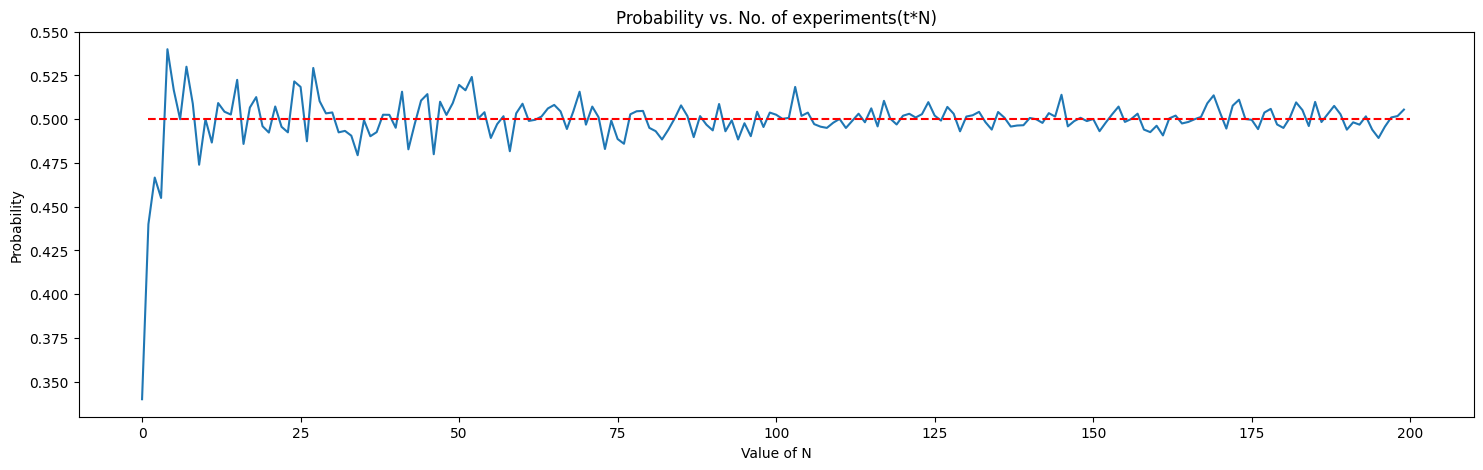

In [4]:
x = [i for i in range(1, 201)]
y = [0.5 for i in range(1, 201)]

plt.figure(figsize=(18, 5))
plt.xlabel("Value of N")
plt.ylabel("Probability")
plt.title("Probability vs. No. of experiments(t*N)")
plt.plot(arr)
plt.plot(x, y, color='red', linestyle='dashed')

### Part (ii)

Part (ii) is done in the pdf file.

### Part (iii)

In [5]:
avg_prob = sum(arr)/len(arr)

In [6]:
print("The average probability is:", avg_prob)

The average probability is: 0.4994648107306176


# Question 3

### Part (i)

In [7]:
df = pd.read_csv("HW1_Q3.csv")

In [8]:
df.head(5)

,var1,var2,var3
0,0.423136,0.593486,0
1,0.154896,0.450922,2
2,0.023467,0.585442,0
3,0.170294,0.386597,0
4,0.308482,0.893703,2


In [9]:
#X = df[["var1"]]
#Y = df[["var2"]]

x = df["var1"]
y = df["var2"]

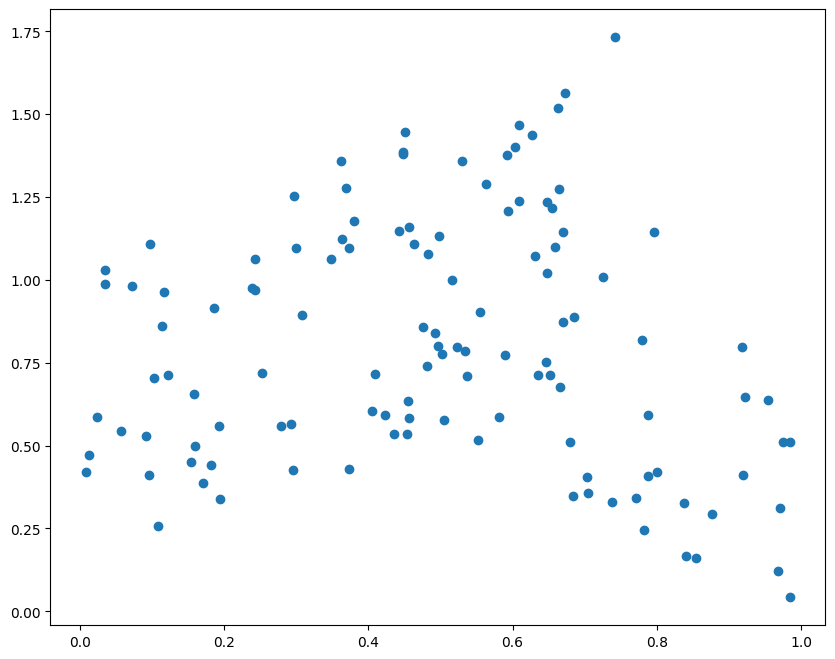

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)

In [11]:
df["var3"].value_counts()

0    45
1    38
2    36
Name: var3, dtype: int64

In [12]:
df1 = df.loc[df["var3"] == 0]
df2 = df.loc[df["var3"] == 1]
df3 = df.loc[df["var3"] == 2]

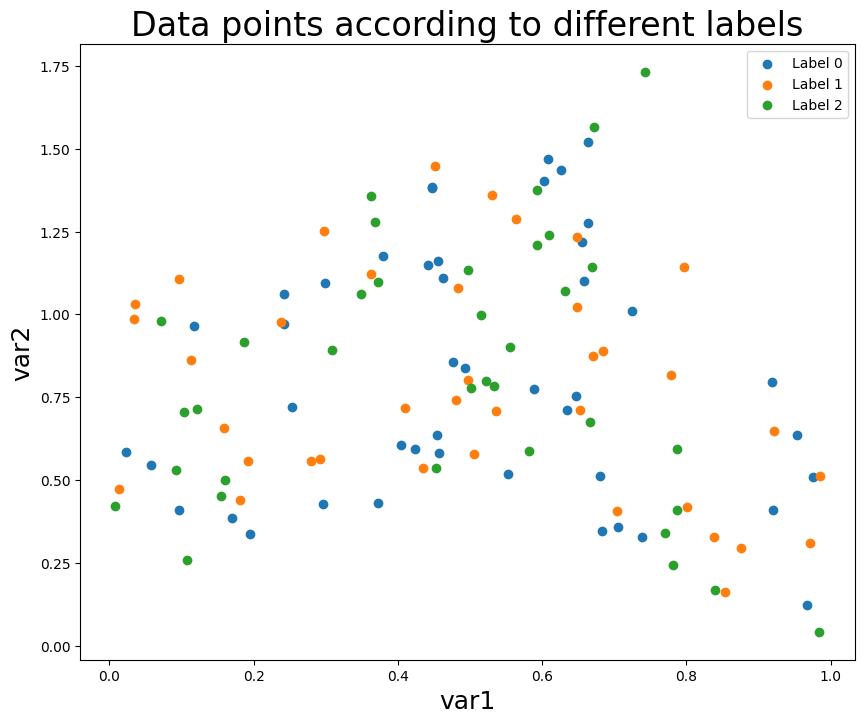

In [13]:
plt.figure(figsize=(10,8))
plt.title("Data points according to different labels", fontsize=24)
plt.xlabel("var1", fontsize=18)
plt.ylabel("var2", fontsize=18)
plt.scatter(df1["var1"], df1["var2"], label="Label 0")
plt.scatter(df2["var1"], df2["var2"], label="Label 1")
plt.scatter(df3["var1"], df3["var2"], label="Label 2")
plt.legend()

After looking into the data through a scatter plot and also looking for the data points belonging to the different 3 classes, it can be seen from above figure that the data given has been clustered randomly. There are no definite clusters to be seen which rules out the fact that there is some relationship between the points. 

Had there been some definite albeit not well-made clusters, an educated guess on what the clusters represent could have been made.

### Part (ii)

In [46]:
#copy dataframe but only use var1 and var2
#copy necessary as this dataframe will be overwritten
df_copy = df[["var1", "var2"]]

In [47]:
df_copy.head()

,var1,var2
0,0.423136,0.593486
1,0.154896,0.450922
2,0.023467,0.585442
3,0.170294,0.386597
4,0.308482,0.893703


In [48]:
def initialize_cluster_centroids(DF, k):
    cmin = DF.min().min()
    cmax = DF.max().max()
    n = DF.shape[1]
    
    cluster_centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(cmin, cmax, n)
        cluster_centroids.append(centroid)

    cluster_centroids = pd.DataFrame(cluster_centroids, columns = DF.columns)

    return cluster_centroids


def SSE(a,b):
    sse = np.square(np.sum((a-b)**2))

    return sse


def assign_cluster_centroids(DF, cluster_centroids):
    n_observations = DF.shape[0]
    assign_centroids = []
    centroid_errors = []
    k = cluster_centroids.shape[0]


    for observation in range(n_observations):

        #Calculate SSE
        sum_of_squared_errors = np.array([])
        for centroid in range(k):
            sse = SSE(cluster_centroids.iloc[centroid, :2], DF.iloc[observation,:2])
            sum_of_squared_errors = np.append(sum_of_squared_errors, sse)

        #Find closest centroid and SSE 
        closest_centroid =  np.where(sum_of_squared_errors == np.amin(sum_of_squared_errors))[0].tolist()[0]
        centroid_error = np.amin(sum_of_squared_errors)

        assign_centroids.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (assign_centroids,centroid_errors)

In [49]:
def myKmeans(DF, k):
    # Initialize cluster_centroids and sse
    cluster_centroids = initialize_cluster_centroids(DF, k)
    sse = []
    flag = True
    i = 0

    while(flag):
        
        #Get cluster centroids
        DF['centroid'], e = assign_cluster_centroids(DF,cluster_centroids)
        sse.append(sum(e))
        
        #Update cluster centroids
        cluster_centroids = DF.groupby('centroid').agg('mean').reset_index(drop = True)

        #Stopping criteria according to SSE
        if(len(sse)<2):
            flag = True
        else:
            if(round(sse[i],3) !=  round(sse[i-1],3)):
                flag = True
            else:
                flag = False
        i = i + 1 

    DF['centroid'], e = assign_cluster_centroids(DF,cluster_centroids)
    cluster_centroids = DF.groupby('centroid').agg('mean').reset_index(drop = True)

    return (DF['centroid'], e, cluster_centroids)

In [50]:
df_copy, _, centroids = myKmeans(df_copy, 3)

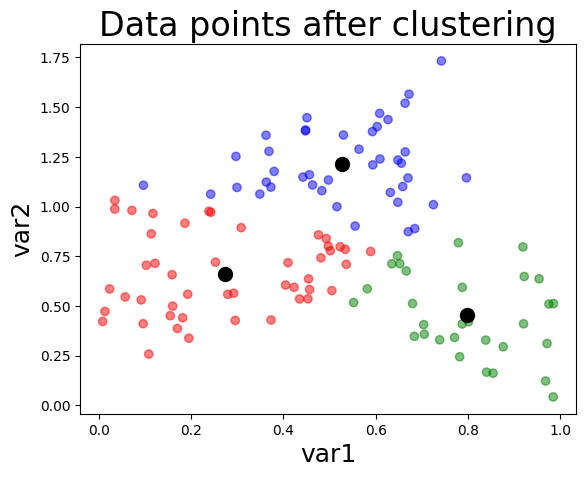

In [52]:
colors = {0:'red', 1:'green', 2:'blue'}

plt.title("Data points after clustering", fontsize=24)
plt.xlabel("var1", fontsize=18)
plt.ylabel("var2", fontsize=18)
plt.scatter(df["var1"], df["var2"], c = df_copy.apply(lambda x: colors[x]), marker = 'o', alpha=0.5)
plt.scatter(centroids["var1"], centroids["var2"], s = 100, c = 'black')

### Part (iii)

Cluster centroids as shown in the above figure are:

In [53]:
centroids

,var1,var2
0,0.273464,0.662118
1,0.798505,0.455890
2,0.527280,1.212569


In [134]:
df_after_clustering = pd.read_csv("HW1_Q3.csv", usecols=[0,1])

### Part (iv)

In [64]:
df4 = df[["var1", "var2"]]

In [65]:
from sklearn.cluster import KMeans

In [66]:
inertia_at_k = []

for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df4)
    
    inertia_at_k.append(km.inertia_)

In [67]:
inertia_at_k

[24.1261367874584,
 12.278201529515428,
 7.419717972390137,
 5.409240572687837,
 3.7549186988435306,
 3.076882182834614,
 2.626275546413838,
 2.2764576245936685,
 1.9000986759020777,
 1.6837782218891244]

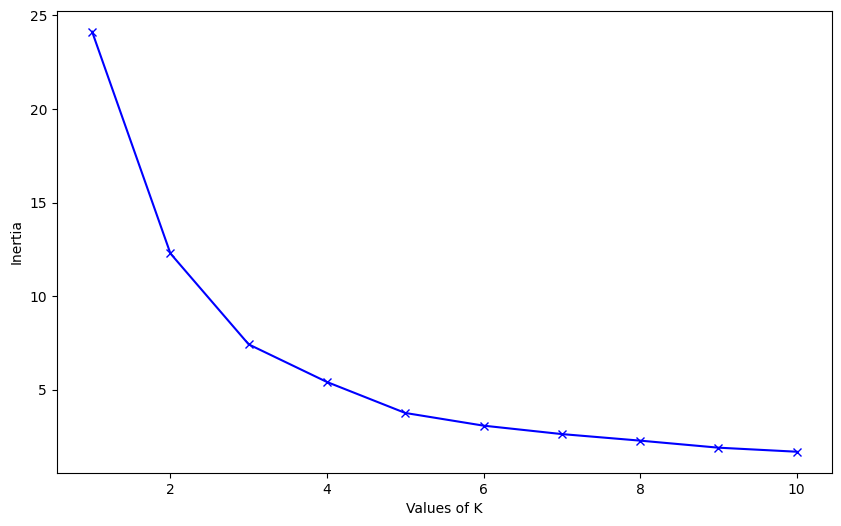

In [68]:
K = [1,2,3,4,5,6,7,8,9,10]

plt.figure(figsize=(10,6))
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.plot(K, inertia_at_k, 'bx-')

As we can see from the figure, the optimal value for k is 3

# Question 4

In [69]:
df_country = pd.read_csv("Country.csv", encoding='latin-1')
df_gdp = pd.read_csv("GDP.csv", header = None, skiprows=range(5), usecols=[0,1,3,4], nrows=190, encoding='latin-1')
df_gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']

In [70]:
df_country.head()

,CountryCode,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,ABW,Aruba,High income: nonOECD,Latin America & Caribbean,NaN,NaN,Aruban florin,2000,NaN,NaN,...,NaN,NaN,NaN,NaN,2008.0,NaN,AW,AW,Aruba,Aruba
1,ADO,Principality of Andorra,High income: nonOECD,Europe & Central Asia,NaN,NaN,Euro,Register based,NaN,NaN,...,NaN,Yes,NaN,NaN,2006.0,NaN,AD,AD,Andorra,Andorra
2,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"MICS, 2003",Fiscal year end: March 20; reporting period fo...,...,NaN,NaN,NaN,NaN,2008.0,2000.0,AF,AF,Afghanistan,Afghanistan
3,AGO,People's Republic of Angola,Lower middle income,Sub-Saharan Africa,IDA,NaN,Angolan kwanza,1970,"MICS, 2001, MIS, 2006/07",NaN,...,"IHS, 2000",NaN,1964-65,NaN,1991.0,2000.0,AO,AO,Angola,Angola
4,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2001,"MICS, 2005",NaN,...,"LSMS, 2005",Yes,1998,2005.0,2008.0,2000.0,AL,AL,Albania,Albania


In [71]:
df_gdp.head()

,CountryCode,Rank,CountryName,GDP
0,USA,1,United States,"16,244,600"
1,CHN,2,China,"8,227,103"
2,JPN,3,Japan,"5,959,718"
3,DEU,4,Germany,"3,428,131"
4,FRA,5,France,"2,612,878"


### Part (i)

In [72]:
df_country["CountryCode"].count()

234

In [73]:
df_gdp["CountryCode"].count()

190

In [74]:
df_gdp_countrycode = pd.merge(df_gdp, df_country, how='inner', on="CountryCode")

In [75]:
print(df_gdp_countrycode["CountryCode"])
print("\n")
print("There are a total of", df_gdp_countrycode["CountryCode"].count(), "matches.")

0      USA
1      CHN
2      JPN
3      DEU
4      FRA
      ... 
184    STP
185    PLW
186    MHL
187    KIR
188    TUV
Name: CountryCode, Length: 189, dtype: object


There are a total of 189 matches.


### Part (ii)

In [76]:
df_gdp_countrycode.head()

,CountryCode,Rank,CountryName,GDP,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,USA,1,United States,"16,244,600",United States of America,High income: OECD,North America,NaN,NaN,U.S. dollar,...,LFS 2000,Yes,1997/2002,2004.0,2008.0,2000.0,US,US,United States,United States
1,CHN,2,China,"8,227,103",People's Republic of China,Lower middle income,East Asia & Pacific,IBRD,NaN,Chinese yuan,...,"IHS, 2005",NaN,1997,2005.0,2008.0,2000.0,CN,CN,China,China
2,JPN,3,Japan,"5,959,718",Japan,High income: OECD,East Asia & Pacific,NaN,NaN,Japanese yen,...,"IS, 1993",Yes,2000,2004.0,2008.0,2000.0,JP,JP,Japan,Japan
3,DEU,4,Germany,"3,428,131",Federal Republic of Germany,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"IHS, 2000",Yes,1999-2000,2004.0,2008.0,2000.0,DE,DE,Germany,Germany
4,FRA,5,France,"2,612,878",French Republic,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"ES/BS, 1994/95",Yes,1999-2000,2004.0,2008.0,2000.0,FR,FR,France,France


In [77]:
x = df_gdp_countrycode["Region"].unique()
y = df_gdp_countrycode["Region"].value_counts()

In [78]:
x

array(['North America', 'East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'South Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa'], dtype=object)

In [79]:
y

Europe & Central Asia         50
Sub-Saharan Africa            46
Latin America & Caribbean     35
East Asia & Pacific           29
Middle East & North Africa    18
South Asia                     8
North America                  3
Name: Region, dtype: int64

We need to sort y otherwise during plotting, North America will get the value of 50 meaning there are 50 countries in North America Region while in reality there are only 3.

In [80]:
#x = x.sort()
y = y.sort_index()

In [81]:
y

East Asia & Pacific           29
Europe & Central Asia         50
Latin America & Caribbean     35
Middle East & North Africa    18
North America                  3
South Asia                     8
Sub-Saharan Africa            46
Name: Region, dtype: int64

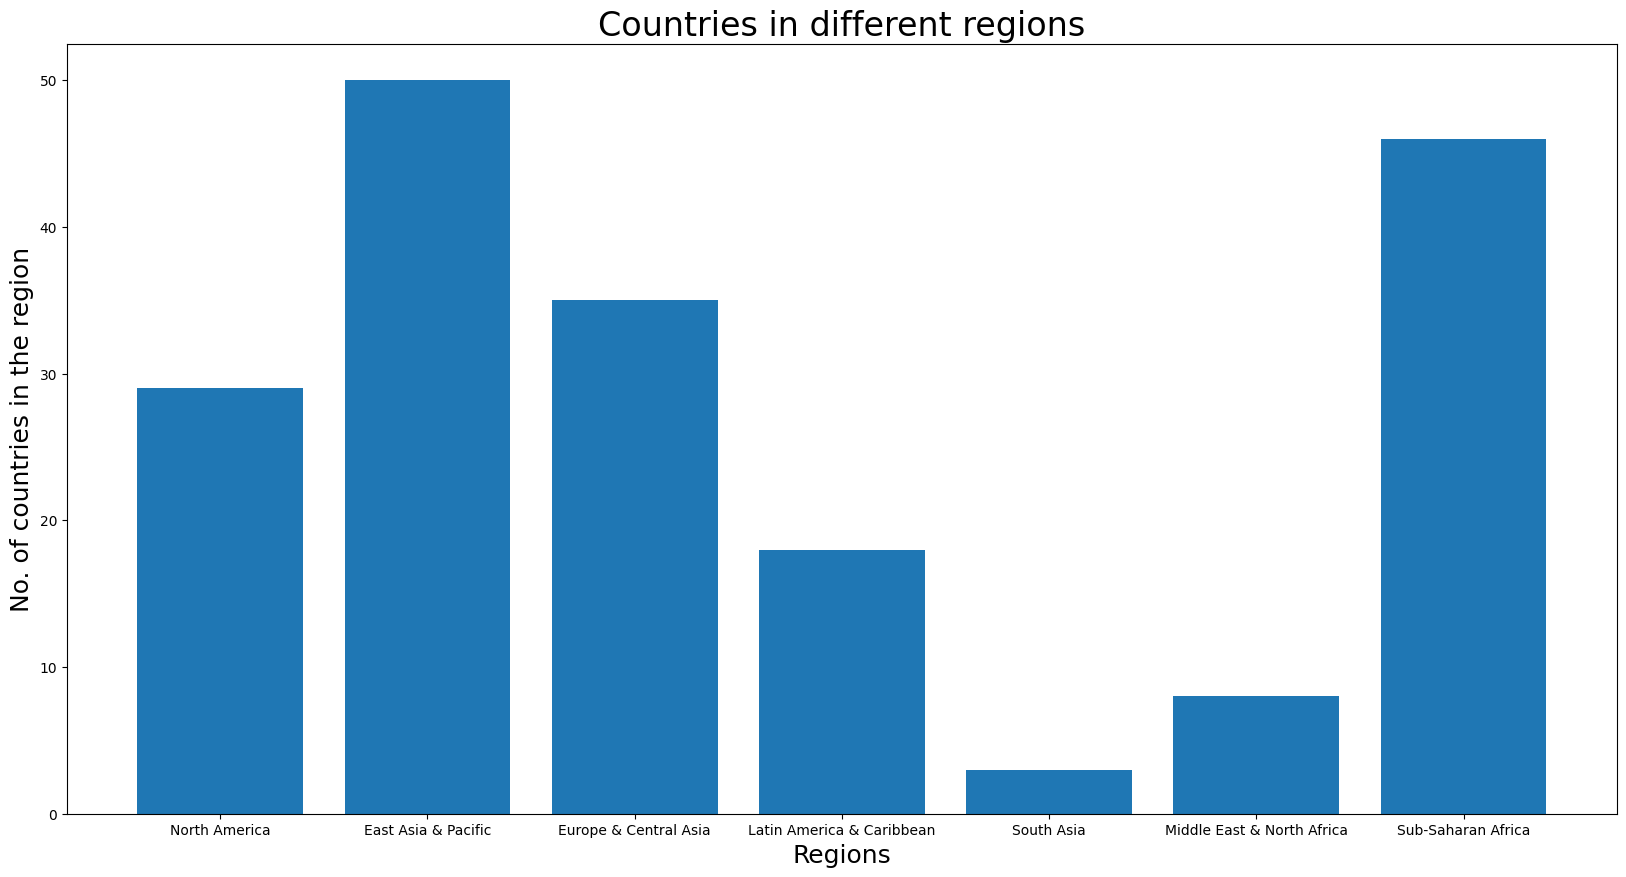

In [83]:
plt.figure(figsize=(20,10))
plt.xlabel("Regions", fontsize=18)
plt.ylabel("No. of countries in the region", fontsize=18)
plt.title("Countries in different regions", fontsize=24)
plt.bar(x,y.sort_index())
plt.show()

Europe & Central Asia has the highest number of countries per region
No. of countries: 50

North America has the least number of countries per region
No. of countries: 3

### Part (iii)

In [84]:
gdp_per_region = df_gdp_countrycode.groupby(['Region'])['GDP'].agg('sum')

In [85]:
gdp_per_region

Region
East Asia & Pacific            8,227,103  5,959,718  1,532,408  1,129,598  8...
Europe & Central Asia          3,428,131  2,612,878  2,471,784  2,014,775  2...
Latin America & Caribbean      2,252,664  1,178,126  475,502  381,286  369,6...
Middle East & North Africa     711,050  514,060  348,595  262,832  258,217  ...
North America                                     16,244,600  1,821,424  5,474 
South Asia                     1,841,710  225,143  116,355  59,423  20,497  ...
Sub-Saharan Africa             384,313  262,597  114,147  58,769  41,605  40...
Name: GDP, dtype: object

In [86]:
EAP = gdp_per_region[0].split()
ECA = gdp_per_region[1].split()
LAC = gdp_per_region[2].split()
MENA = gdp_per_region[3].split()
NA = gdp_per_region[4].split()
SA = gdp_per_region[5].split()
SSA = gdp_per_region[6].split()

In [87]:
gpr = [EAP, ECA, LAC, MENA, NA, SA, SSA]
gpr_arr = ["EAP", "ECA", "LAC", "MENA", "NA", "SA", "SSA"]

In [88]:
from scipy.stats import ks_2samp

In [89]:
stat = {}
p_val = {}

for i in range(len(gpr)):
    for j in range(i+1, len(gpr)):
        stat[gpr_arr[i]+'-'+gpr_arr[j]], p_val[gpr_arr[i]+'-'+gpr_arr[j]] = ks_2samp(gpr[i], gpr[j])

In [90]:
stat

{'EAP-ECA': 0.27379310344827584,
 'EAP-LAC': 0.1852216748768473,
 'EAP-MENA': 0.3103448275862069,
 'EAP-NA': 0.39080459770114945,
 'EAP-SA': 0.46120689655172414,
 'EAP-SSA': 0.11619190404797601,
 'ECA-LAC': 0.15142857142857144,
 'ECA-MENA': 0.17777777777777778,
 'ECA-NA': 0.5666666666666667,
 'ECA-SA': 0.515,
 'ECA-SSA': 0.2426086956521739,
 'LAC-MENA': 0.23174603174603176,
 'LAC-NA': 0.4666666666666667,
 'LAC-SA': 0.5321428571428571,
 'LAC-SSA': 0.1826086956521739,
 'MENA-NA': 0.6666666666666666,
 'MENA-SA': 0.6527777777777778,
 'MENA-SSA': 0.34541062801932365,
 'NA-SA': 0.2916666666666667,
 'NA-SSA': 0.38405797101449274,
 'SA-SSA': 0.41847826086956524}

In [91]:
p_val

{'EAP-ECA': 0.10097010509209532,
 'EAP-LAC': 0.5704150820425788,
 'EAP-MENA': 0.1805890146990459,
 'EAP-NA': 0.6661290322580644,
 'EAP-SA': 0.09913546460036021,
 'EAP-SSA': 0.9385183293673833,
 'ECA-LAC': 0.6713244703950489,
 'ECA-MENA': 0.7273721456217954,
 'ECA-NA': 0.22479296508153335,
 'ECA-SA': 0.03305444536905447,
 'ECA-SSA': 0.09664174523993692,
 'LAC-MENA': 0.4760778477585885,
 'LAC-NA': 0.4599336178283547,
 'LAC-SA': 0.03243201314670401,
 'LAC-SSA': 0.4554490408888822,
 'MENA-NA': 0.14436090225563913,
 'MENA-SA': 0.009827975228432899,
 'MENA-SSA': 0.0690441116491449,
 'NA-SA': 0.9757575757575755,
 'NA-SSA': 0.677594442032132,
 'SA-SSA': 0.13592469003714192}

In [92]:
ks_test_table = {"statistic": stat, "p-value": p_val}

In [93]:
df_ks_test = pd.DataFrame(ks_test_table)

In [94]:
df_ks_test

,statistic,p-value
EAP-ECA,0.273793,0.100970
EAP-LAC,0.185222,0.570415
EAP-MENA,0.310345,0.180589
EAP-NA,0.390805,0.666129
EAP-SA,0.461207,0.099135
EAP-SSA,0.116192,0.938518
ECA-LAC,0.151429,0.671324
ECA-MENA,0.177778,0.727372
ECA-NA,0.566667,0.224793
ECA-SA,0.515000,0.033054


In [95]:
#Different distribution

df_ks_test[df_ks_test["p-value"] <= 0.08]

,statistic,p-value
ECA-SA,0.515000,0.033054
LAC-SA,0.532143,0.032432
MENA-SA,0.652778,0.009828
MENA-SSA,0.345411,0.069044


In [96]:
#Different distribution but a bit more similar

df_ks_test[(df_ks_test["p-value"] > 0.08) & (df_ks_test["p-value"] <= 0.25)]

,statistic,p-value
EAP-ECA,0.273793,0.100970
EAP-MENA,0.310345,0.180589
EAP-SA,0.461207,0.099135
ECA-NA,0.566667,0.224793
ECA-SSA,0.242609,0.096642
MENA-NA,0.666667,0.144361
SA-SSA,0.418478,0.135925


In [97]:
#High chance of coming from same distribution

df_ks_test[(df_ks_test["p-value"] > 0.25) & (df_ks_test["p-value"] <= 0.85)]

,statistic,p-value
EAP-LAC,0.185222,0.570415
EAP-NA,0.390805,0.666129
ECA-LAC,0.151429,0.671324
ECA-MENA,0.177778,0.727372
LAC-MENA,0.231746,0.476078
LAC-NA,0.466667,0.459934
LAC-SSA,0.182609,0.455449
NA-SSA,0.384058,0.677594


In [98]:
#Since very high p value, cannot say

df_ks_test[df_ks_test["p-value"] > 0.85]

,statistic,p-value
EAP-SSA,0.116192,0.938518
NA-SA,0.291667,0.975758


### Part (iv)

On trying to normalize the data, the GDP is in string list and to convert it into int or float is producing an error about the size. I tried to search for the fix but same error was being shown

The error: invalid literal for int() with base 10: '8,227,103'

However, normalizing the data and then applying the KS-test may lead to data that was significantly similar to significantly different.

# Question 5

In [112]:
x = [1.23, 1.57, 1.69, 1.5, 1.83, 1.57, 1.01, 1.61, 1.02, 1.32, 1.79]
x_2 = [x[i]**2 for i in range(len(x))]
t = [2.67, 3.25, 3.53, 3.1, 3.93, 3.25, 2.48, 3.34, 2.49, 2.79, 3.81]

In [113]:
data = [[x[i], x_2[i]] for i in range(len(x))]

In [114]:
data

[[1.23, 1.5129],
 [1.57, 2.4649],
 [1.69, 2.8560999999999996],
 [1.5, 2.25],
 [1.83, 3.3489000000000004],
 [1.57, 2.4649],
 [1.01, 1.0201],
 [1.61, 2.5921000000000003],
 [1.02, 1.0404],
 [1.32, 1.7424000000000002],
 [1.79, 3.2041]]

In [115]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components=1)

In [117]:
pca.fit(data)

PCA(n_components=1)

In [118]:
new = pca.transform(data)

In [119]:
new = np.squeeze(new)

In [120]:
new = new.tolist()

In [121]:
slope = (t[1]-t[0])/(new[1]-new[0])

In [122]:
intercept = t[4] - (slope*new[4])

In [123]:
X = np.linspace(-1.5,1.5,100)
Y = slope*X + intercept

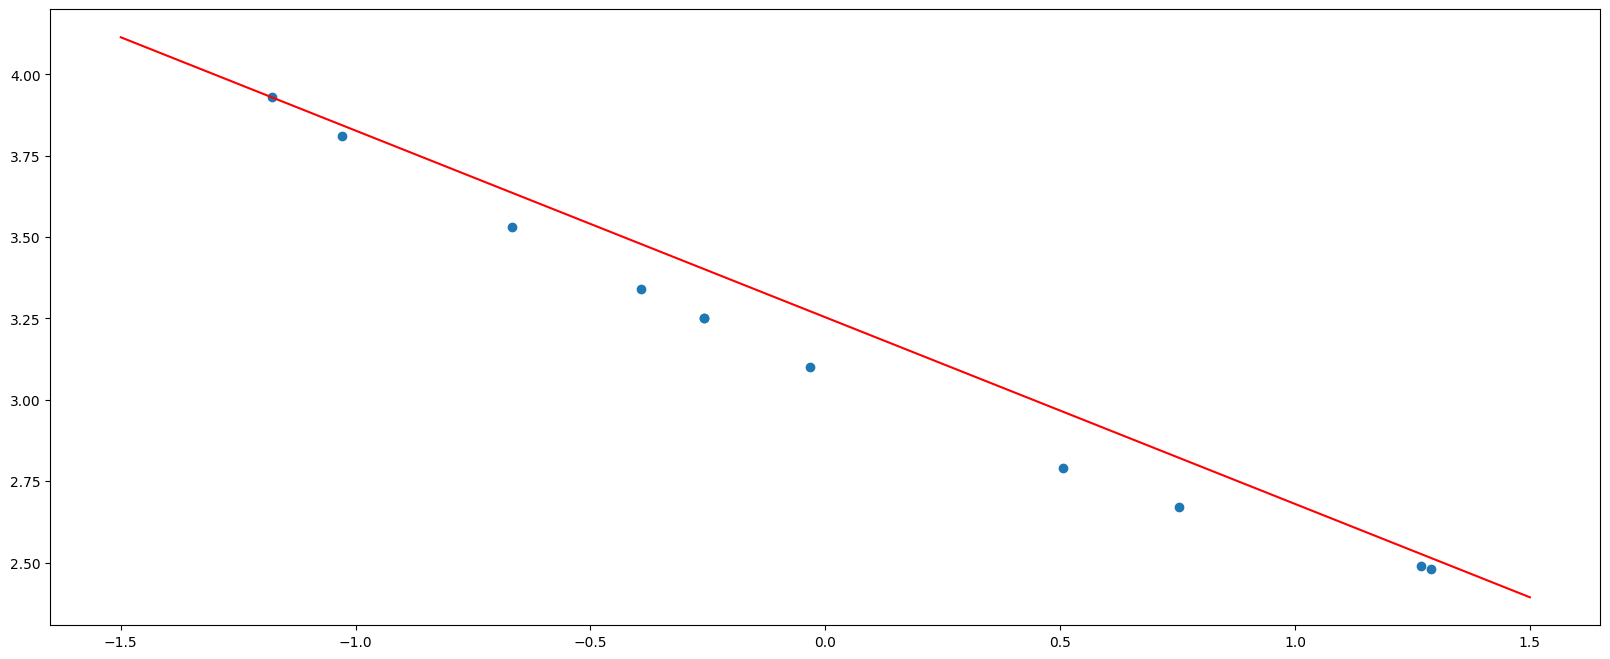

In [124]:
plt.figure(figsize=(20, 8))
plt.scatter(new, t)
plt.plot(X, Y, '-r')

As you can see the graph is more or less linear with the decomposition. It is not parallel to any of the axes and decomposing x and x^2 data would still give some deviation as squaring a two-digit decimal would give a number with 4 decimal digit.